In [ ]:
import kaggle
kaggle.api.authenticate()

In [ ]:
!kaggle competitions download -c cat-in-the-dat-ii

In [ ]:
! mkdir cat-in-the-dat-ii

In [ ]:
!mv cat-in-the-dat-ii.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
%config Completer.use_jedi=False

In [2]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_train

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.0,1.0,0.0,T,N,Red,Polygon,Axolotl,India,...,015c63324,3.0,Novice,Freezing,a,R,GZ,5.0,NaN,0
599996,599996,1.0,0.0,0.0,T,Y,Blue,Polygon,Dog,Costa Rica,...,a02ae6a63,2.0,Novice,Boiling Hot,n,N,sf,NaN,3.0,0
599997,599997,0.0,0.0,0.0,F,Y,Red,Circle,Axolotl,Russia,...,40f9610c1,2.0,Contributor,Freezing,n,H,MV,7.0,5.0,0
599998,599998,1.0,1.0,0.0,F,Y,NaN,Polygon,Axolotl,NaN,...,c1a8374a0,1.0,Master,Warm,m,X,Ey,1.0,5.0,0


In [4]:
df_test

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,600000,0.0,0.0,0.0,F,Y,Blue,Polygon,Axolotl,Finland,...,ca9ad1d4b,fced9e114,3.0,Novice,Boiling Hot,f,U,oU,3.0,9.0
1,600001,0.0,0.0,0.0,F,Y,Red,Circle,Lion,Russia,...,060a21580,7ca8775da,1.0,Novice,Cold,n,N,NaN,2.0,8.0
2,600002,0.0,0.0,0.0,F,Y,Blue,Circle,Axolotl,Russia,...,165e81a00,5940334c9,1.0,Expert,Warm,i,N,DN,2.0,6.0
3,600003,1.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Costa Rica,...,77d41330d,6fbdeefc8,1.0,Expert,Hot,m,B,AG,1.0,6.0
4,600004,0.0,0.0,1.0,F,Y,Red,Circle,NaN,Finland,...,2218d9dfe,2a27c8fde,1.0,Contributor,Lava Hot,o,J,DT,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,999995,0.0,0.0,1.0,T,N,Red,Trapezoid,Axolotl,Costa Rica,...,c1a4acfaf,45a68dd2e,2.0,Expert,Warm,n,R,dp,2.0,12.0
399996,999996,0.0,0.0,0.0,F,N,Red,Polygon,Dog,Russia,...,220190c9e,e48348d66,1.0,Contributor,NaN,n,X,US,1.0,5.0
399997,999997,0.0,0.0,1.0,T,N,Red,Triangle,Hamster,NaN,...,cc5495ab3,47021df0d,1.0,Grandmaster,Boiling Hot,m,P,TL,1.0,6.0
399998,999998,0.0,0.0,0.0,F,Y,Red,Circle,Dog,Costa Rica,...,32b33a4b4,e4bf32721,3.0,Novice,Lava Hot,h,L,DI,2.0,11.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

In [6]:
df_train.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
count,600000.000000,582106.000000,581997.000000,582070.000000,581712.000000,582048.000000,582012.000000,600000.000000
mean,299999.500000,0.092301,0.185532,0.278704,1.948224,4.112767,6.371317,0.187205
std,173205.225094,0.289451,0.388729,0.448362,0.853904,2.034430,3.458959,0.390076
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,149999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000
50%,299999.500000,0.000000,0.000000,0.000000,2.000000,5.000000,6.000000,0.000000
75%,449999.250000,0.000000,0.000000,1.000000,3.000000,6.000000,8.000000,0.000000
max,599999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.000000


In [7]:
df_train.isna().sum()

id            0
bin_0     17894
bin_1     18003
bin_2     17930
bin_3     18014
bin_4     18047
nom_0     18252
nom_1     18156
nom_2     18035
nom_3     18121
nom_4     18035
nom_5     17778
nom_6     18131
nom_7     18003
nom_8     17755
nom_9     18073
ord_0     18288
ord_1     18041
ord_2     18075
ord_3     17916
ord_4     17930
ord_5     17713
day       17952
month     17988
target        0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

# DATA TIDING

In [9]:
y=df_train.target # target values
df_train=df_train.drop(["id","target"],axis=1) # drop id and target columns , update the dataframe

   #                                            IMPUTING

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
simpimp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_train=pd.DataFrame(simpimp.fit_transform(df_train.fillna(np.nan)),columns=df_train.columns).astype(df_train.dtypes)

                                                                                                                 

In [12]:
df_train.dtypes

bin_0    float64
bin_1    float64
bin_2    float64
bin_3     object
bin_4     object
nom_0     object
nom_1     object
nom_2     object
nom_3     object
nom_4     object
nom_5     object
nom_6     object
nom_7     object
nom_8     object
nom_9     object
ord_0    float64
ord_1     object
ord_2     object
ord_3     object
ord_4     object
ord_5     object
day      float64
month    float64
dtype: object

# CATEGORICAL ENCODING

In [13]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction import FeatureHasher

In [14]:
def category_type(data):
    for column in df_train.columns:
        if df_train[column].dtypes== object:
            df_train[column]=df_train[column].astype("category")


# ORDINAL and ONE HOT ENCODING

In [15]:
#df_train.iloc[:,3:5]##  Ordinal Encoding
#df_train.iloc[:,5:15]## One hot encoding 
#df_train.iloc[:,16:21]##ordinal encoding
preprocessor=ColumnTransformer(transformers=[("ordinal_encoding",OrdinalEncoder(),df_train.iloc[:,3:5].columns.union(df_train.iloc[:,16:21].columns)), 
                                              ("one_hot_encoding",OneHotEncoder(drop="first"),df_train.iloc[:,5:15].columns)],remainder="passthrough")
#preprocessor=ColumnTransformer(transformers=[("ordinal_encoding",OrdinalEncoder(),df_train.iloc[:,3:15].columns.union(df_train.iloc[:,16:21].columns))],
                                 #remainder="passthrough")
#preprocessor=ColumnTransformer(transformers=[("feature_hasher",FeatureHasher(n_features=23,input_type='string'),[df_train.iloc[:,3:15].columns.union(df_train.iloc[:,16:21].columns)])],
                                 #remainder="passthrough")                                                



In [16]:
#X= preprocessor.fit_transform(df_train.iloc[:400000]).toarray()
X= preprocessor.fit_transform(df_train).toarray()

In [17]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,5419,5420,5421,5422,5423,5424,5425,5426,5427,5428
0,0.0,0.0,0.0,3.0,2.0,20.0,56.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,3.0
1,0.0,1.0,2.0,5.0,4.0,23.0,150.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,7.0,7.0
2,0.0,0.0,4.0,2.0,13.0,15.0,105.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,5.0,9.0
3,0.0,0.0,4.0,4.0,0.0,2.0,21.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0
4,1.0,0.0,2.0,1.0,7.0,2.0,50.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,1.0,0.0,4.0,2.0,0.0,17.0,22.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,5.0,8.0
599996,1.0,1.0,4.0,0.0,13.0,13.0,163.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,3.0
599997,0.0,1.0,0.0,2.0,13.0,7.0,42.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,5.0
599998,0.0,1.0,3.0,5.0,12.0,23.0,18.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,5.0


#  Balancing DataSets (Unequal Classes)

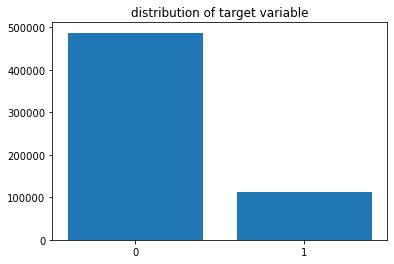

In [18]:
#y=tar[:X.shape[0]]
plt.bar(y.value_counts().index,y.value_counts().values)
plt.gca().set_xticks([0,1])
plt.title('distribution of target variable')
plt.show()

In [19]:
from imblearn.under_sampling import RandomUnderSampler


In [20]:
ros=RandomUnderSampler(replacement=False )
X_resampled,y_resampled=ros.fit_resample(X,y)

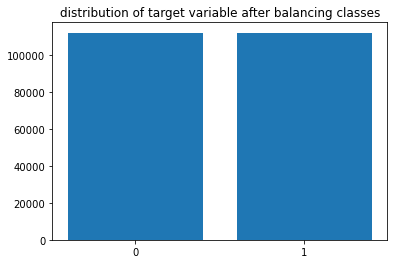

In [21]:
plt.bar(y_resampled.value_counts().index,y_resampled.value_counts().values)
plt.gca().set_xticks([0,1])
plt.title('distribution of target variable after balancing classes')
plt.show()

# Dimension Reduction using PCA

In [22]:
del X 

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2)

In [24]:
del X_resampled,y_resampled

In [25]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((179716, 5429), (179716,), (44930, 5429), (44930,))

In [26]:
pca=PCA(n_components=2)

In [34]:
X_train_pca = pca.fit_transform(X_train)

In [35]:
X_test_pca = pca.transform(X_test)

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,ConfusionMatrixDisplay


In [36]:
logreg=LogisticRegression()
logreg.fit(X_train_pca,y_train)

LogisticRegression()

In [37]:
logreg.score(X_train_pca,y_train)

0.579581116873289

In [41]:
y_pred=logreg.predict(X_test_pca)

In [39]:
logreg.score(X_test_pca,y_test)

0.5798575561985311

In [42]:
f1_score(y_test,y_pred)

0.5802219306633459

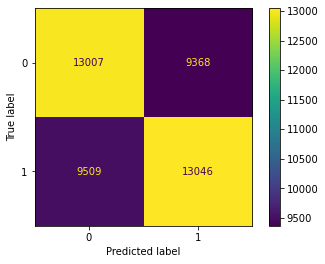

In [48]:
cm=confusion_matrix(y_test,y_pred,labels=logreg.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()